In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

In [19]:
data = pd.read_csv('token_frequency_comparison.csv')

In [20]:
data

,token,real_freq,fake_freq,freq_diff,token_str
0,1071,97853,32934,64919,said
1,39155,42267,73797,31530,trump
2,15928,28699,464,28235,uters
3,312,30575,5389,25186,re
4,603,42612,22747,19865,us
...,...,...,...,...,...
33423,88099,1,1,0,accordion
33424,99813,1,1,0,yeni
33425,81157,32,32,0,generation
33426,34662,13,13,0,honour


In [21]:
data.columns = ['Token', 'Real News Frequency', 'Fake News Frequency', 'Frequency Difference', 'Token String']

In [22]:
def find_largest_group(data):
    """ 
    For each row, find in which group the token appears most frequently.
    Then add this information to the DataFrame.
    """
    data['Largest Group'] = data.iloc[:, 1:3].idxmax(axis=1)
    return data

In [23]:
test = find_largest_group(data)

In [24]:
test.head(5)

,Token,Real News Frequency,Fake News Frequency,Frequency Difference,Token String,Largest Group
0,1071,97853,32934,64919,said,Real News Frequency
1,39155,42267,73797,31530,trump,Fake News Frequency
2,15928,28699,464,28235,uters,Real News Frequency
3,312,30575,5389,25186,re,Real News Frequency
4,603,42612,22747,19865,us,Real News Frequency


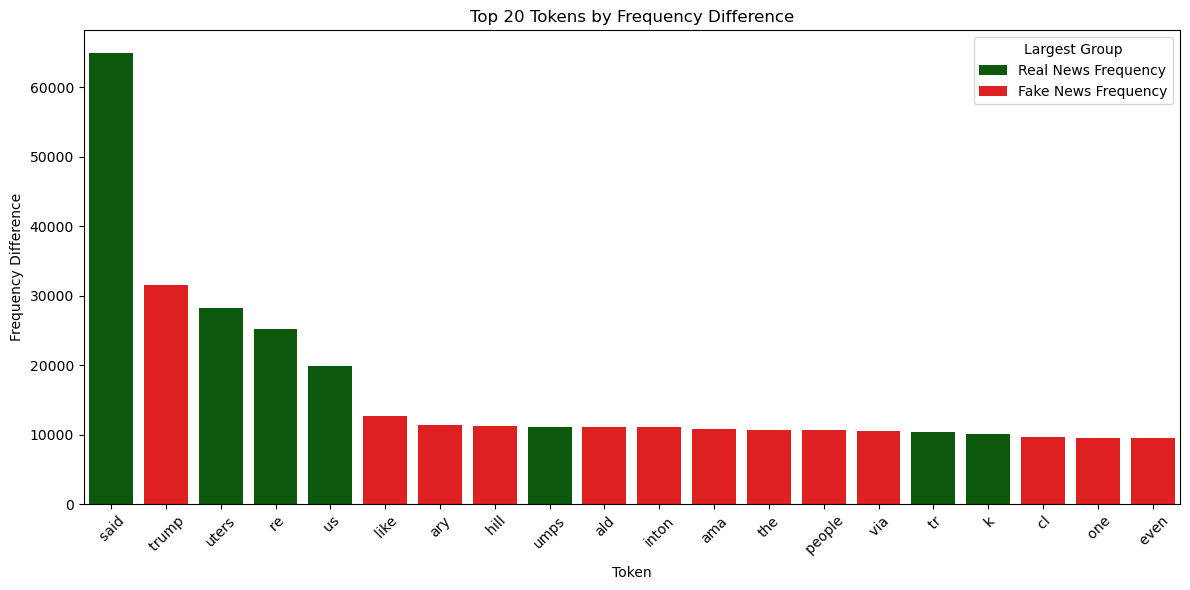

In [25]:
# Create a color mapping for the largest_group
palette = {'Real News Frequency': 'darkgreen', 'Fake News Frequency': 'red'}

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Token String',
    y='Frequency Difference',
    hue='Largest Group',
    data=test.nlargest(20, 'Frequency Difference'),
    palette=palette
)
plt.xticks(rotation=45)
plt.title('Top 20 Tokens by Frequency Difference')
plt.xlabel('Token')
plt.ylabel('Frequency Difference')
plt.legend(title='Largest Group')
plt.tight_layout()
plt.show()